## Reset Previous Work

In [1]:
pth = "/bigstore/GeneralStorage/fangming/projects/test_merfish/data"

In [2]:
from MERFISH_Objects.execute_class import *
import shutil

2022-08-22 15:22:51,411 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [3]:
import importlib
# importlib.reload(MERFISH_Objects.execute_class)

In [4]:
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)

In [5]:
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']

In [6]:
for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])

daemon_path /scratch/test_daemon_FX
utilities_path /scratch/test_merfish_FX
fishdata fishdata_testFX


In [7]:
import time
from tqdm import trange
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO

In [8]:
from MERFISH_Objects.execute_class import *
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
bitmap = config.bitmap
parameters = config.parameters

In [9]:
posname = '7-Pos004_003'#image_metadata.posnames[0]

# Process Single Position

In [10]:
%%time
self = Dataset_Class(metadata_path, dataset, cword_config, verbose=True)
self.main()

15:22:51 Checking Imaging: 0it [00:00, ?it/s]
15:22:51 Checking Hot Pixel: 0it [00:00, ?it/s]
15:22:51 Checking Position Flags: 100%|██████████| 150/150 [00:00<00:00, 2178.78it/s]

CPU times: user 119 ms, sys: 35.3 ms, total: 154 ms
Wall time: 196 ms


### Spot Calling

In [14]:
# Input = []
# hybe = 'hybe2'
# channel = 'FarRed'
# self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
# self.check_projection()
# zindexes = self.zindexes

# x_window = [500,750]
# y_window = [1000,1250]

In [15]:
# zindex = str(zindexes[0])
# for readout,hybe,channel in bitmap:
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
#     self.parameters['spot_minmass'] = 5#self.parameters['spot_parameters']['default']['spot_minmass']
#     self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
#     self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
#     self.img = self.fishdata.load_data('image',
#                                         dataset=self.dataset,
#                                         posname=self.posname,
#                                         hybe=self.hybe,
#                                         channel=self.channel,
#                                         zindex=self.zindex)/self.parameters['gain']
#     self.call_spots()
    
#     # vmin,vmax = np.percentile(self.img.ravel(),[50,99.9])
#     # plt.figure(figsize=[10,10])
#     # plt.title('Processed')
#     # plt.imshow(self.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     # plt.scatter(self.spots.x,self.spots.y, s=20, facecolors='none', edgecolors='r')
#     # # plt.colorbar()
#     # plt.xlim(x_window)
#     # plt.ylim(y_window)
#     # plt.show()
#     # break

In [16]:
# zindex = str(zindexes[0])
# for readout,hybe,channel in bitmap:
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
#     self.parameters['spot_minmass'] = 10#self.parameters['spot_parameters']['default']['spot_minmass']
#     self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
#     self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
#     self.img = self.fishdata.load_data('image',
#                                         dataset=self.dataset,
#                                         posname=self.posname,
#                                         hybe=self.hybe,
#                                         channel=self.channel,
#                                         zindex=self.zindex)/self.parameters['gain']
#     self.call_spots()
#     vmin,vmax = np.percentile(self.img.ravel(),[50,99.9])
#     plt.figure(figsize=[10,10])
#     plt.title('Processed')
#     plt.imshow(self.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     plt.scatter(self.spots.x,self.spots.y, s=20, facecolors='none', edgecolors='r')
#     # plt.colorbar()
#     plt.xlim(x_window)
#     plt.ylim(y_window)
#     plt.show()
#     # break

### Classification

In [17]:
from MERFISH_Objects.execute_class import *
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'

def pfunc(zindex):
    self = Classify_Class(metadata_path,dataset,posname,zindex,cword_config,verbose=False)
    self.parameters['spot_max_distance'] = self.parameters['spot_parameters']['default']['spot_max_distance']
    self.parameters['spot_minmass'] = 5#self.parameters['spot_parameters']['default']['spot_minmass']
    self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
    self.parameters['spot_separation'] = self.parameters['spot_parameters']['default']['spot_separation']
    self.main()

In [18]:
%%time
Input = []
hybe = 'hybe2'
channel = 'FarRed'
self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
self.check_projection()
zindexes = self.zindexes
Input = [i for i in zindexes]
ncpu = 10
pool = multiprocessing.Pool(ncpu)
sys.stdout.flush()
results = pool.imap(pfunc, Input)
iterable = tqdm(results,total=len(Input),desc=str(datetime.now().strftime("%H:%M:%S"))+' '+dataset,position=0)
for i in iterable:
    pass
pool.close()
sys.stdout.flush()

15:31:26 Zebra_B0_2022Jul11: 100%|██████████| 1/1 [04:26<00:00, 266.68s/it]

CPU times: user 105 ms, sys: 242 ms, total: 347 ms
Wall time: 4min 26s


##### Visual Check

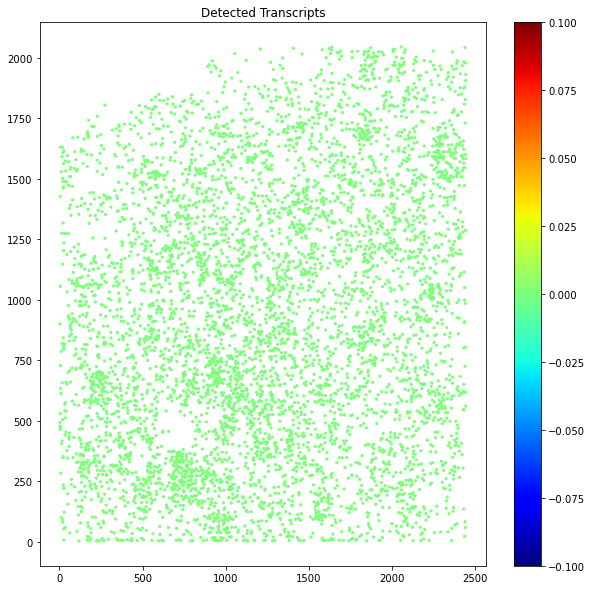

In [23]:
spots = []
for zindex in zindexes:
    spots.append(self.fishdata.load_data('spotcalls',dataset=dataset,posname=posname,zindex=zindex))
spots = pd.concat(spots,ignore_index=True)
plt.figure(figsize=[10,10])
plt.title('Detected Transcripts')
plt.scatter(spots.x,spots.y,s=5,c=spots.zindex,cmap='jet')
plt.colorbar()
plt.show()

In [24]:
print(len([i for i in config.codebook.index[spots.cword_idx] if 'blank' in i]))
print(len(spots))

576
5972


In [25]:
%%time
### zindex = 0
self = Classify_Class(metadata_path,dataset,posname,zindex,cword_config,verbose=True)
self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
self.parameters['spot_minmass'] = 5#self.parameters['spot_parameters']['default']['spot_minmass']
self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
self.parameters['spot_separation'] = self.parameters['spot_max_distance']#self.parameters['spot_parameters']['default']['spot_separation']

self.call_spots()

Calling Spots: 100%|██████████| 18/18 [00:42<00:00,  2.38s/it]
15:37:30 75333 Spots Found: 0it [00:00, ?it/s]

CPU times: user 25.1 s, sys: 17.7 s, total: 42.8 s
Wall time: 42.9 s


In [26]:
# X = np.zeros([self.spots.shape[0],3])
# X[:,0] = self.spots.x.astype(float)*self.parameters['pixel_size']
# X[:,1] = self.spots.y.astype(float)*self.parameters['pixel_size']
# X[:,2] = self.spots.zindex.astype(float)*self.merfish_config.parameters['z_step_size']
# clustering = DBSCAN(eps=self.parameters['spot_max_distance']*self.parameters['pixel_size'], min_samples=3).fit(X)
# self.spots['label'] = clustering.labels_
# bad_labels = [i for i,c in Counter(clustering.labels_).items() if c>18 if not i==-1]
# zindex = str(zindexes[0])
# for bit,(readout,hybe,channel) in enumerate(bitmap):
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     IMG = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     IMG.img = IMG.fishdata.load_data('image',
#                                         dataset=IMG.dataset,
#                                         posname=IMG.posname,
#                                         hybe=IMG.hybe,
#                                         channel=IMG.channel,
#                                         zindex=IMG.zindex)/IMG.parameters['gain']
#     vmin,vmax = np.percentile(IMG.img.ravel(),[50,99.9])
#     plt.figure(figsize=[10,10])
#     plt.title('Processed')
#     plt.imshow(IMG.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     mask = (self.spots['bit']==bit)&(np.isin(self.spots['label'],bad_labels))
#     plt.scatter(self.spots.x[mask],self.spots.y[mask], s=20, facecolors='none', edgecolors='r')
#     plt.xlim(x_window)
#     plt.ylim(y_window)
#     plt.show()

In [27]:
# plt.figure(figsize=[10,10])
# plt.title('Processed')
# plt.imshow(IMG.img,vmin=vmin,vmax=vmax,cmap='Greys')
# mask = (np.isin(self.spots['label'],bad_labels))
# plt.scatter(self.spots.x[mask],self.spots.y[mask], s=20, facecolors='none', edgecolors='r')
# # plt.xlim(x_window)
# # plt.ylim(y_window)
# plt.show()

In [28]:
# X = np.zeros([self.spots.shape[0],3])
# X[:,0] = self.spots.x.astype(float)*self.parameters['pixel_size']
# X[:,1] = self.spots.y.astype(float)*self.parameters['pixel_size']
# X[:,2] = self.spots.zindex.astype(float)*self.merfish_config.parameters['z_step_size']
# clustering = DBSCAN(eps=3, min_samples=3).fit(X)
# self.spots['label'] = clustering.labels_

# zindex = str(zindexes[0])
# for bit,(readout,hybe,channel) in enumerate(bitmap):
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     IMG = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     IMG.img = IMG.fishdata.load_data('image',
#                                         dataset=IMG.dataset,
#                                         posname=IMG.posname,
#                                         hybe=IMG.hybe,
#                                         channel=IMG.channel,
#                                         zindex=IMG.zindex)/IMG.parameters['gain']
#     vmin,vmax = np.percentile(IMG.img.ravel(),[50,99.9])
#     plt.figure(figsize=[10,10])
#     plt.title('Processed')
#     plt.imshow(IMG.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     mask = (self.spots['bit']==bit)&(np.isin(self.spots['label'],[-1]))
#     plt.scatter(self.spots.x[mask],self.spots.y[mask], s=20, facecolors='none', edgecolors='r')
#     plt.xlim(x_window)
#     plt.ylim(y_window)
#     plt.show()

In [29]:
# X = np.zeros([self.spots.shape[0],3])
# X[:,0] = self.spots.x.astype(float)*self.parameters['pixel_size']
# X[:,1] = self.spots.y.astype(float)*self.parameters['pixel_size']
# X[:,2] = self.spots.zindex.astype(float)*self.merfish_config.parameters['z_step_size']
# clustering = DBSCAN(eps=3, min_samples=3).fit(X)
# self.spots['label'] = clustering.labels_
# bad_labels = [i for i,c in Counter(clustering.labels_).items() if c>=6 if not i==-1]
# zindex = str(zindexes[0])
# for bit,(readout,hybe,channel) in enumerate(bitmap):
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     IMG = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     IMG.img = IMG.fishdata.load_data('image',
#                                         dataset=IMG.dataset,
#                                         posname=IMG.posname,
#                                         hybe=IMG.hybe,
#                                         channel=IMG.channel,
#                                         zindex=IMG.zindex)/IMG.parameters['gain']
#     vmin,vmax = np.percentile(IMG.img.ravel(),[50,99.9])
#     plt.figure(figsize=[10,10])
#     plt.title('Processed')
#     plt.imshow(IMG.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     mask = (self.spots['bit']==bit)&(np.isin(self.spots['label'],bad_labels))
#     plt.scatter(self.spots.x[mask],self.spots.y[mask], s=20, facecolors='none', edgecolors='r')
#     plt.xlim(x_window)
#     plt.ylim(y_window)
#     plt.show()

In [30]:
# X = np.zeros([self.spots.shape[0],3])
# X[:,0] = self.spots.x.astype(float)*self.parameters['pixel_size']
# X[:,1] = self.spots.y.astype(float)*self.parameters['pixel_size']
# X[:,2] = self.spots.zindex.astype(float)*self.merfish_config.parameters['z_step_size']
# clustering = DBSCAN(eps=3, min_samples=3).fit(X)
# self.spots['label'] = clustering.labels_
# bad_labels = [i for i,c in Counter(clustering.labels_).items() if c>=6 if not i==-1]
# zindex = str(zindexes[0])
# for bit,(readout,hybe,channel) in enumerate(bitmap):
#     print(readout,hybe,channel)
#     """ Processed Image Zoom"""
#     IMG = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     IMG.img = IMG.fishdata.load_data('image',
#                                         dataset=IMG.dataset,
#                                         posname=IMG.posname,
#                                         hybe=IMG.hybe,
#                                         channel=IMG.channel,
#                                         zindex=IMG.zindex)/IMG.parameters['gain']
#     vmin,vmax = np.percentile(IMG.img.ravel(),[50,99.9])
#     plt.figure(figsize=[10,10])
#     plt.title('Processed')
#     plt.imshow(IMG.img,vmin=vmin,vmax=vmax,cmap='Greys')
#     mask = (self.spots['bit']==bit)&(np.isin(self.spots['label'],bad_labels))
#     plt.scatter(self.spots.x[mask],self.spots.y[mask], s=20, facecolors='none', edgecolors='r')
#     plt.xlim(x_window)
#     plt.ylim(y_window)
#     plt.show()